### Main Takeaways
- Greater dispersion error for more precise models with fewer alts
- Non-linear relationship between sample size and dispersion error
    - least linear for models with fewer alts

In [1419]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from matplotlib.ticker import FuncFormatter, AutoMinorLocator

In [1269]:
df1 = pd.read_csv('../data/disp_err_scale_iters_v2.csv')
df2 = pd.read_csv('../data/disp_err_scale_iters_importance.csv')

In [1270]:
df1.groupby(['num_alts','num_choosers']).run_id.nunique()

num_alts  num_choosers
200       750             100
2000      7500             50
20000     75000            10
200000    750000            5
2000000   7500000           3
Name: run_id, dtype: int64

In [1038]:
big = df1[df1['num_alts'] == 2000000]

In [1273]:
dfs = [
    df1,
#     df2, df3,
    df2
]

In [1290]:
data.num_alts.value_counts()

200.0       10
2000.0      10
20000.0     10
200000.0    10
Name: num_alts, dtype: int64

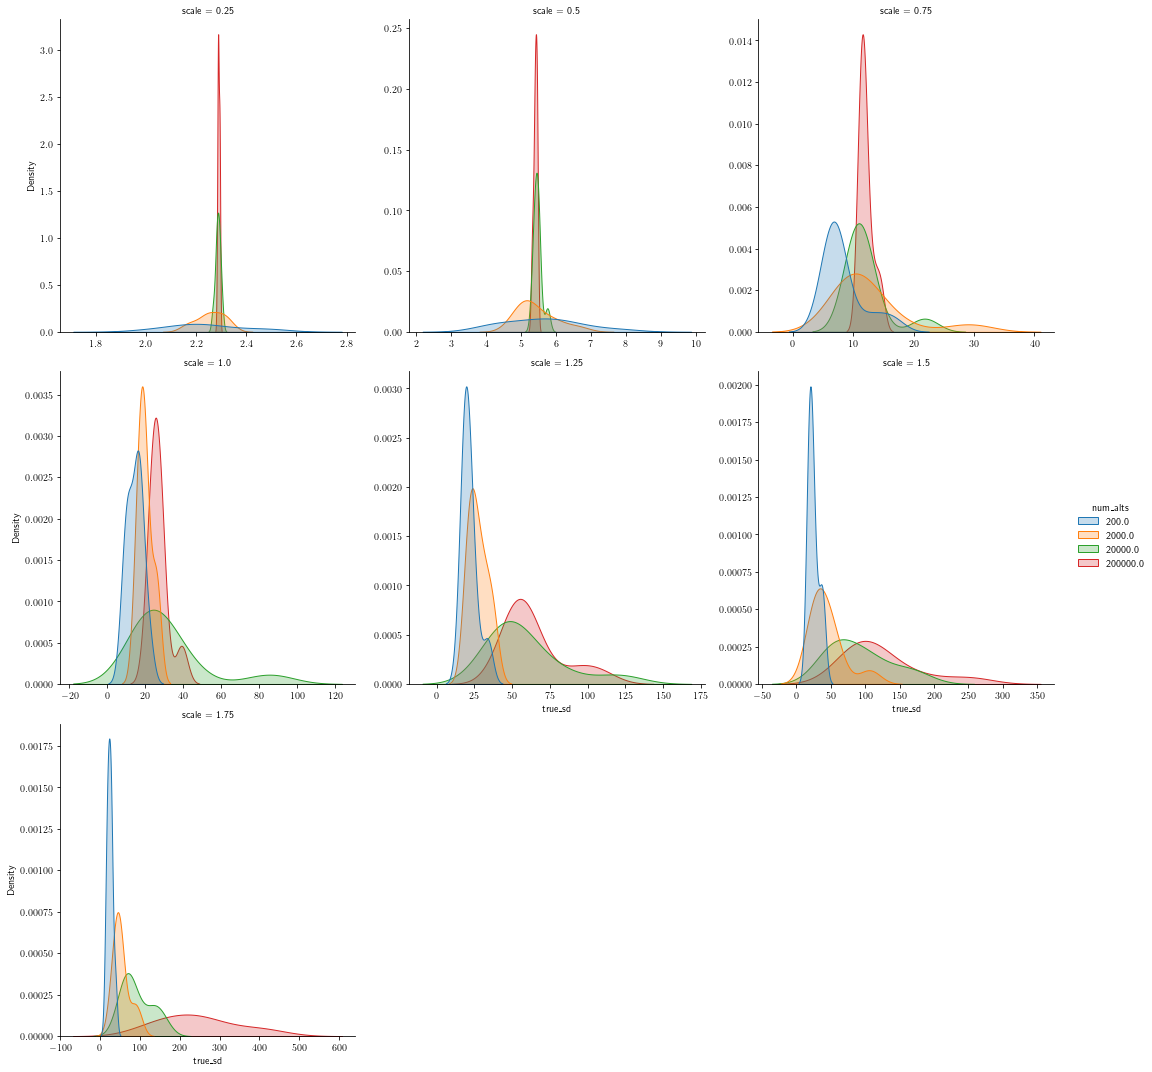

In [1323]:
data = df2[(df2['sample_rate'] == 1)]
sns.displot(
    data=data, x='true_sd', hue=data['num_alts'].astype(str), kind='kde', fill=True, col='scale', col_wrap=3,
    facet_kws={'sharex':False, 'sharey':False})
sns.despine()

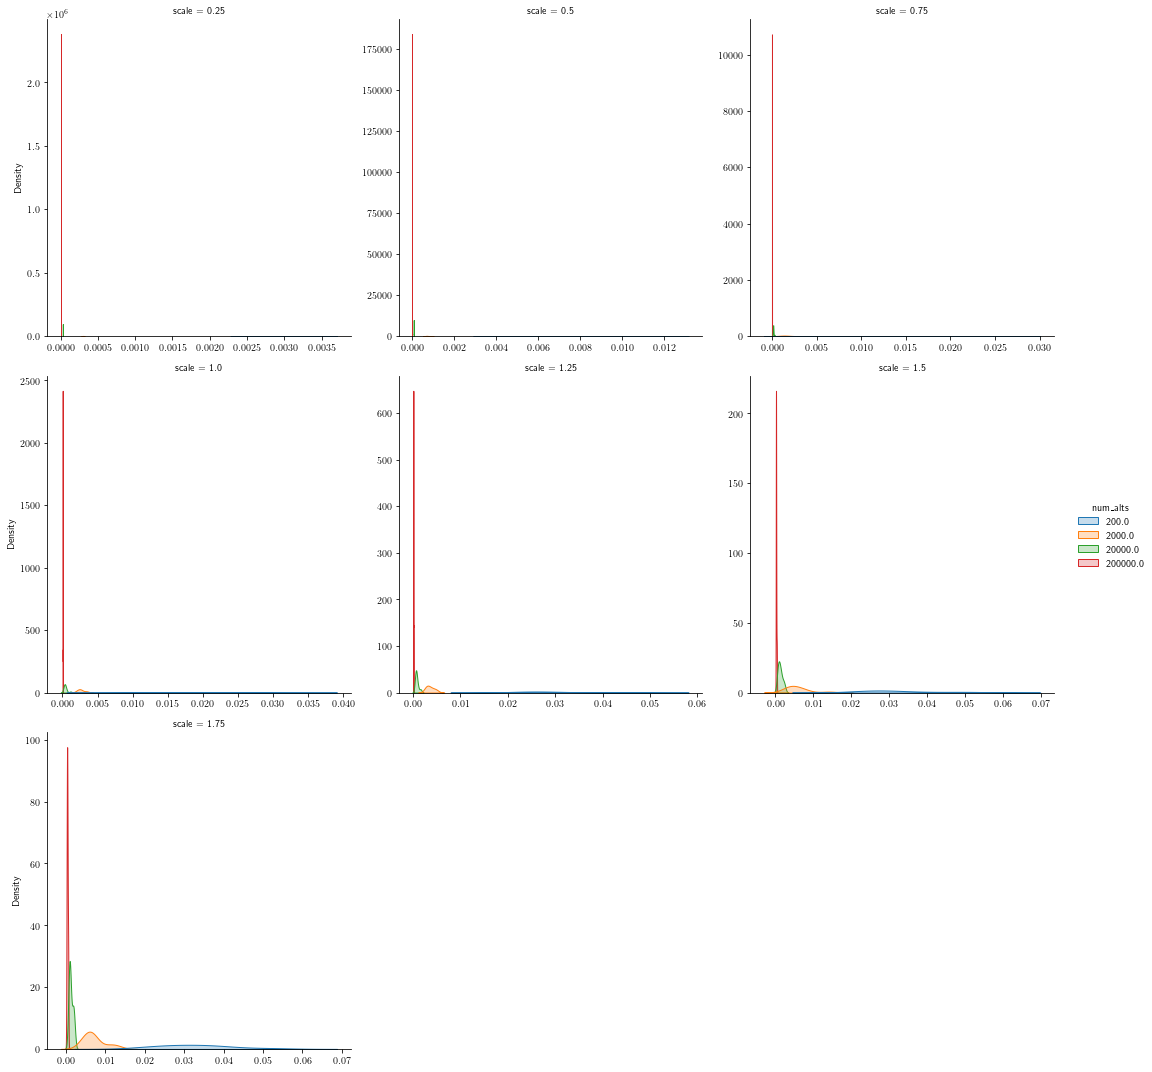

In [1337]:
data = df2[(df2['sample_rate'] == 1)]
sns.displot(
    data=data, x=data['true_sd']/data['num_choosers'], hue=data['num_alts'].astype(str), kind='kde', fill=True, col='scale', col_wrap=3,
    facet_kws={'sharex':False, 'sharey':False})
sns.despine()

/home/mgardner/anaconda3/envs/proba/lib/python3.9/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/home/mgardner/anaconda3/envs/proba/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


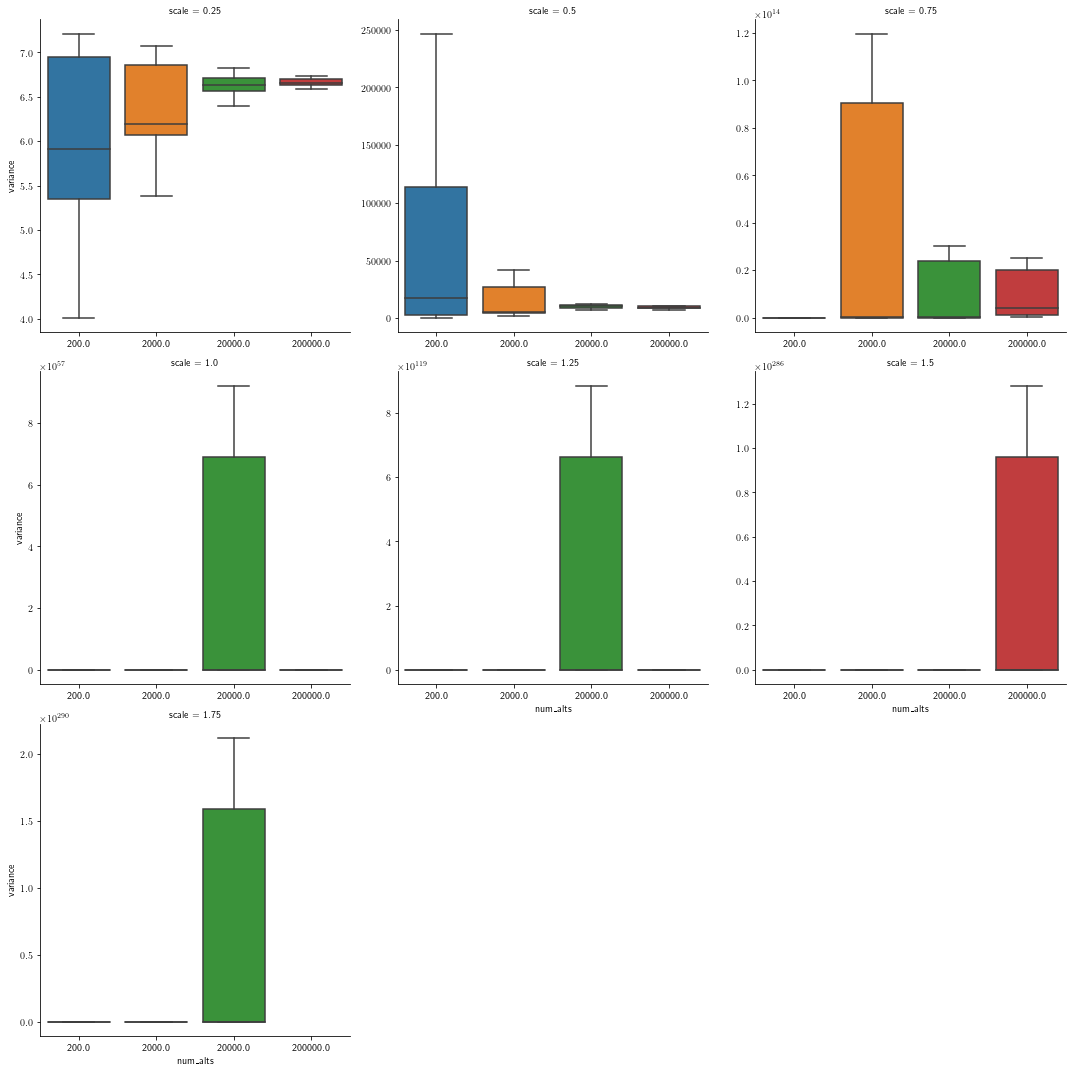

In [1346]:
data = df2[(df2['sample_rate'] == 1)].copy()
data['num_alts'] = data['num_alts'].astype(str)
data['variance'] = data['true_sd'] ** data['true_sd']
# fig, ax = plt.subplots()
sns.catplot(data=data, x='num_alts', col='scale', y='variance', kind='box', col_wrap=3, 
            sharex=False, sharey=False, showfliers=0)
sns.despine()
# ax.set_yscale("log")

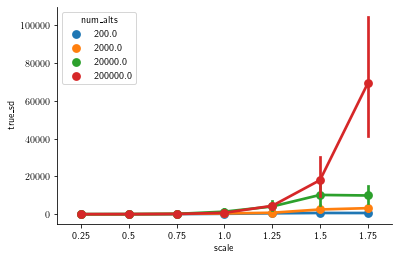

In [1341]:
data = df2[(df2['sample_rate'] == 1)]
fig, ax = plt.subplots()
sns.pointplot(
    data=data, y=data['true_sd']**2, x='scale', hue=data['num_alts'].astype(str), ax=ax)
sns.despine()
# ax.set_yscale("log")

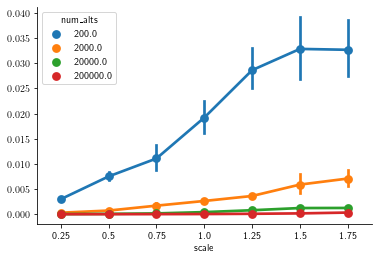

In [1340]:
data = df2[(df2['sample_rate'] == 1)]
fig, ax = plt.subplots()
sns.pointplot(
    data=data, y=data['true_sd'] / data['num_choosers'], x='scale', hue=data['num_alts'].astype(str), ax=ax)
sns.despine()


In [997]:
num_metrics = 5
non_metric_cols = ['num_alts', 'num_choosers', 'sample_rate','run_id']
metric_cols = ['total_abs_err', 'pct_abs_err', 'rmse', 'mape', 'sd_pct_err']
metric_labels = [
    "Total Absolute Error",
    "Pct Abs Err",
    "RMSE",
    "MAPE",
    "Std. Dev. Pct. Err.",
]
df_labels = ['random sampling', 'weighted sampling']

/home/mgardner/anaconda3/envs/proba/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


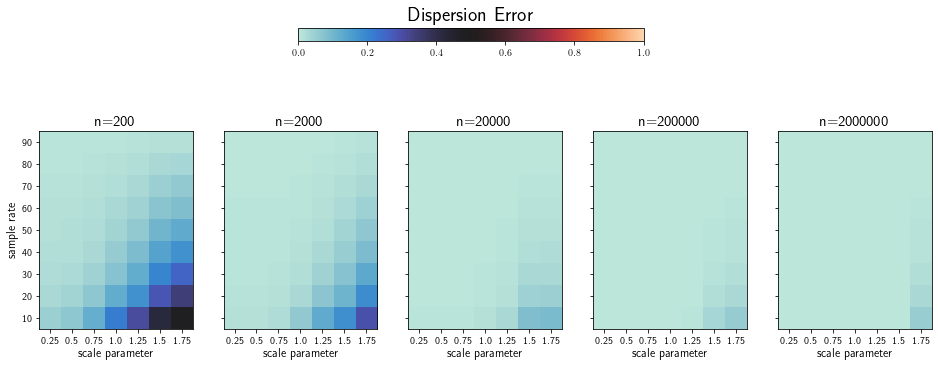

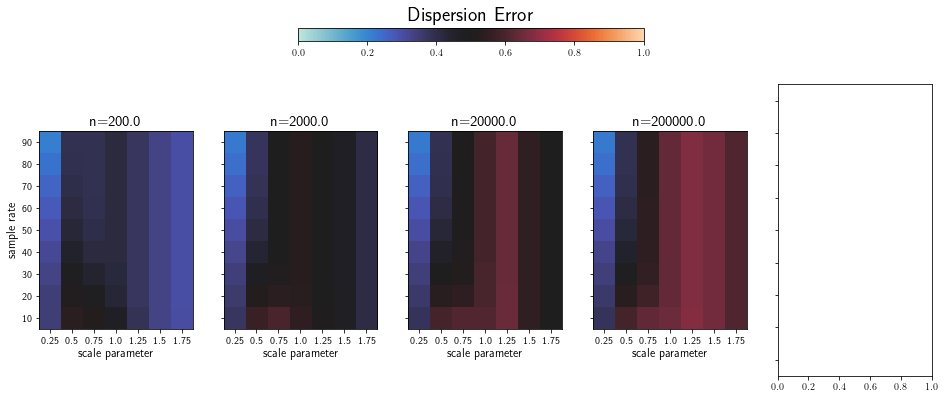

In [1275]:
metric = 'total_abs_err'
for df in dfs:
    df[metric] = df[metric].astype(float).abs()
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
    num_num_alts_values = 5
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1
    vmin = 0
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)]
        tmp_df[metric] = tmp_df[metric] / (2 * tmp_df['num_choosers'].unique())
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='median')
        piv_df = piv_df.sort_index(level=0, ascending=False)
        
        im = ax.imshow(piv_df, cmap='icefire', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)
        
#         std_piv = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='std')
#         std_piv = std_piv.sort_index(level=0, ascending=False)
#         std_text = std_piv.values.round(2)
#         for i in range(len(piv_df.index.tolist())):
#             for j in range(len(piv_df.columns.tolist())):
#                 text = ax.text(j, i, std_text[i, j],
#                                ha="center", va="center", color="k", fontsize=8)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    fig.subplots_adjust(top=0.8)
    cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    fig.suptitle("Dispersion Error", fontsize=20)


In [146]:
piv_df.index.tolist()

['90%', '80%', '70%', '60%', '50%', '40%', '30%', '20%', '10%']

In [140]:
std_piv.sort_index(level=0, ascending=False)

scale,0.25,0.50,0.75,1.00,1.25,1.50,1.75
sample_rate,,,,,,,
90%,0.000178,0.000350,0.002180,0.010649,0.015843,0.022346,0.024122
80%,0.000254,0.000489,0.004779,0.020665,0.031886,0.043185,0.048048
70%,0.000288,0.000806,0.007646,0.032745,0.049081,0.064058,0.070072
60%,0.000435,0.001382,0.011144,0.044367,0.067021,0.083996,0.093031
50%,0.000530,0.001646,0.015112,0.057282,0.084157,0.105141,0.114641
40%,0.000569,0.002166,0.021107,0.071325,0.102854,0.124785,0.133947
30%,0.000852,0.003543,0.027390,0.086909,0.119479,0.142089,0.150095
20%,0.001121,0.005645,0.037401,0.102568,0.135800,0.154772,0.161492
10%,0.002360,0.009863,0.050265,0.110264,0.136969,0.149831,0.154447


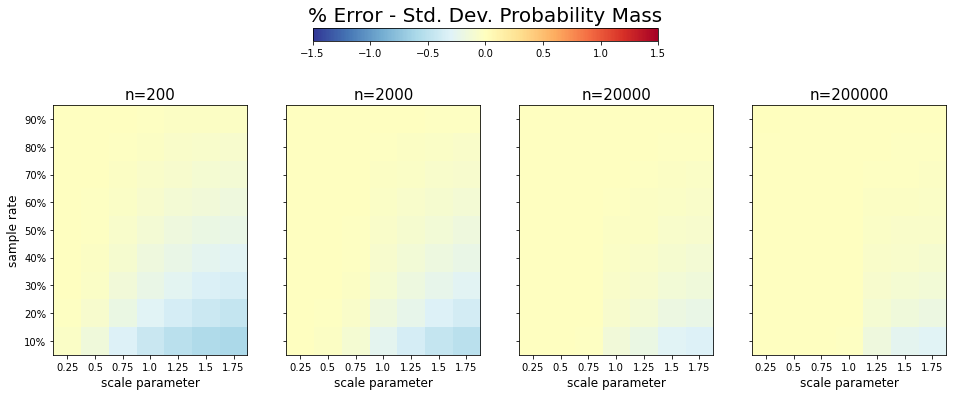

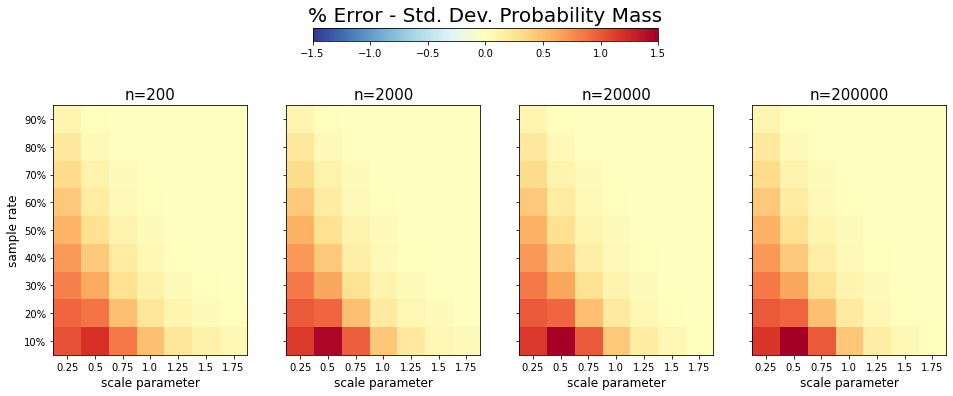

In [22]:
metric = 'sd_pct_err'
for df in dfs:
    df[metric] = df[metric].astype(float)
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
#     num_num_alts_values = len(num_alts_values)
    num_num_alts_values = 4
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1.5  #df[df['sample_rate'] < 1].groupby(['sample_rate', 'scale', 'num_alts'])[metric].mean().abs().max()
    vmin = -vmax
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)]
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric)
        piv_df = piv_df.sort_index(level=0, ascending=False)
        im = ax.imshow(piv_df, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    fig.subplots_adjust(top=0.8)
    cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    fig.suptitle("% Error - Std. Dev. Probability Mass", fontsize=20)


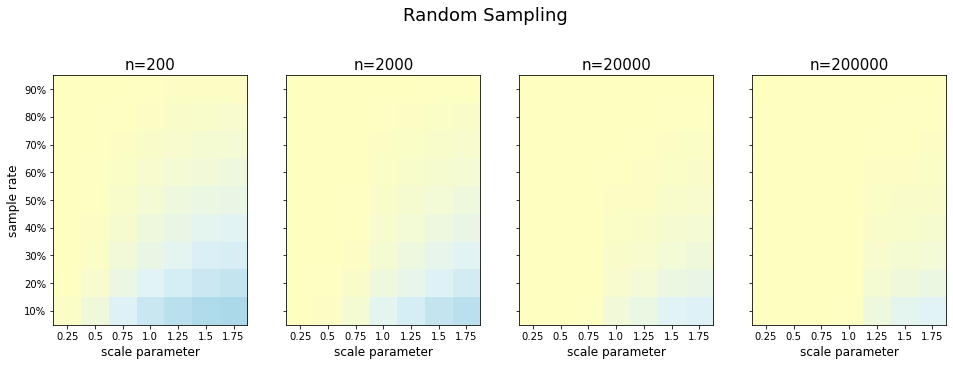

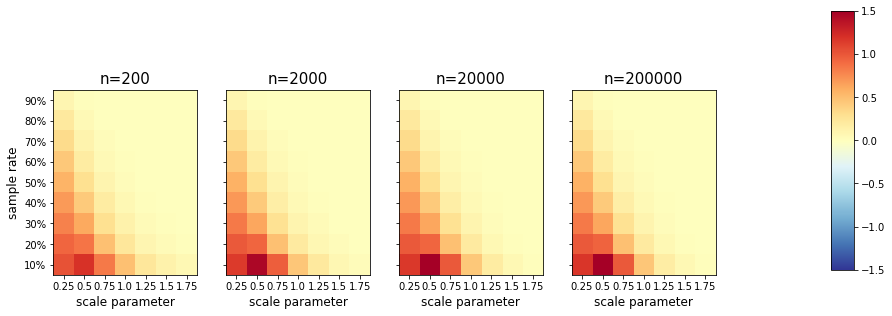

In [80]:
metric = 'sd_pct_err'
for d, df in enumerate(dfs):
    df[metric] = df[metric].astype(float)
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
#     num_num_alts_values = len(num_alts_values)
    num_num_alts_values = 4
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1.5  #df[df['sample_rate'] < 1].groupby(['sample_rate', 'scale', 'num_alts'])[metric].mean().abs().max()
    vmin = -vmax
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)].copy()
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric)
        piv_df = piv_df.sort_index(level=0, ascending=False)
        im = ax.imshow(piv_df, cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    
    if d == 0:
        fig.suptitle("Random Sampling", fontsize=18, y=.95)

    else:
        fig.subplots_adjust(right=0.7)
        cbar_ax = fig.add_axes([0.8, .3, 0.02, 0.6])
        cbar = fig.colorbar(im, cax=cbar_ax)
#         cbar.set_label("% Error -- Std. Dev. Total Prob. Mass.", fontsize=15)
#         fig.suptitle("Weighted Sampling", fontsize=18, y=.85)


In [2]:
x = pd.Series(np.random.exponential(1, 750)) 
y = pd.Series(np.random.exponential(0.25, 750))
z = pd.Series(np.random.exponential(5, 750)) 

Text(0.5, 0, '$i$')

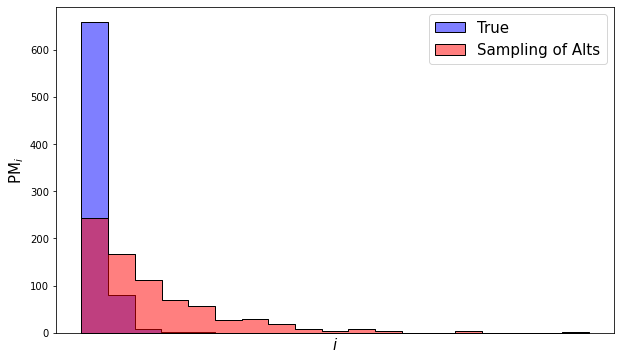

In [286]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(
    x=x.sort_values(ascending=False), binwidth=1, alpha=0.5, color='b', edgecolor='k', bins=25, stat='count', label='True',
    ax=ax, element='step'
)
sns.histplot(
    x=z.sort_values(ascending=False), binwidth=1, alpha=0.5, color='r',edgecolor='k', bins=25, stat='count', label='Sampling of Alts',
    ax=ax, element='step'
)
ax.legend(fontsize=15)
ax.set_xticks([])
ax.set_ylabel(r'PM$_i$', fontsize=15)
ax.set_xlabel(r"$i$", fontsize=15)

In [37]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

/tmp/ipykernel_1389764/4288949194.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [55]:
expon.pdf(x) - expon.pdf(x, 0, .5)

array([-0.9702    , -0.841325  , -0.72581916, -0.6224091 , -0.52993834,
       -0.44735671, -0.37371082, -0.30813526, -0.24984466, -0.19812646,
       -0.15233427, -0.11188193, -0.07623797, -0.0449207 , -0.01749362,
        0.00643866,  0.02723419,  0.04521709,  0.06068065,  0.07389019,
        0.08508556,  0.09448359,  0.1022801 ,  0.10865193,  0.11375865,
        0.11774416,  0.12073818,  0.12285757,  0.12420747,  0.1248825 ,
        0.12496766,  0.12453927,  0.12366583,  0.12240869,  0.12082278,
        0.11895721,  0.11685584,  0.11455776,  0.11209779,  0.10950686,
        0.10681241,  0.10403873,  0.10120728,  0.09833694,  0.09544431,
        0.09254392,  0.08964844,  0.08676888,  0.08391474,  0.0810942 ,
        0.07831422,  0.07558072,  0.07289864,  0.07027208,  0.06770439,
        0.06519824,  0.0627557 ,  0.06037834,  0.05806723,  0.05582305,
        0.05364614,  0.05153649,  0.04949385,  0.04751772,  0.0456074 ,
        0.04376202,  0.04198055,  0.04026186,  0.03860469,  0.03

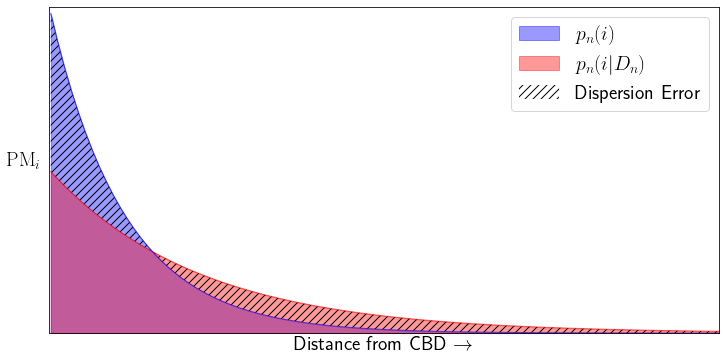

In [76]:
from scipy.stats import expon
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
a = ax.plot(x, expon.pdf(x),
       'r-', lw=1, alpha=0.6, )
b = ax.plot(x, expon.pdf(x, 0, .5),
       'b-', lw=1, alpha=0.6,)
# ax.plot(x[:16], expon.pdf(x, 0, .5)[:16],
#        'k--', lw=1, alpha=1)
# ax.plot(x[:16], expon.pdf(x)[:16],
#        'k--', lw=1, alpha=1)

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
ax.set_xlim(0,4.5)
ax.set_ylim(0,2)
ax.fill_between(x, expon.pdf(x, 0, .5), color='b', alpha=0.4,  label=r'$p_n(i)$',)
ax.fill_between(x, expon.pdf(x, 0, 1), color='r', alpha=0.4, label=r'$p_n(i | D_n)$',)

c = ax.fill_between(x[:16], expon.pdf(x, 0, 1)[:16], expon.pdf(x, 0, .5)[:16], 
                facecolor='none', linewidth=0.0, hatch='///', label='Dispersion Error')
ax.fill_between(x[15:], expon.pdf(x, 0, .5)[15:], expon.pdf(x, 0, 1)[15:],
                facecolor='none', linewidth=0.0, hatch='///')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(r'$\mathrm{PM}_i$', fontsize=20, rotation=0, labelpad=25)
ax.set_xlabel(r"Distance from CBD $\to$", fontsize=20)
ax.legend(fontsize=20)

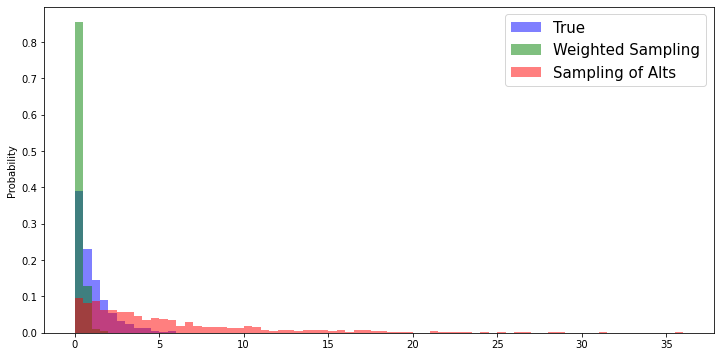

In [184]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(
    x=x, binwidth=.5, alpha=0.5, color='b', edgecolor='none', bins=25, stat='probability', label='True',
    ax=ax, 
)
sns.histplot(
    x=y, binwidth=.5, alpha=0.5, color='g',edgecolor='none', bins=25, stat='probability', label='Weighted Sampling',
    ax=ax)
ax.legend(fontsize=15)
sns.histplot(
    x=z, binwidth=.5, alpha=0.5, color='r',edgecolor='none', bins=25, stat='probability', label='Sampling of Alts',
    ax=ax)
ax.legend(fontsize=15)


# 2D heatmap grid 

In [1349]:
df = pd.read_csv('../data/disp_err_scale_iters_v3.csv')

In [1350]:
df = pd.concat((df, big))

In [1262]:
df

,sample_rate,total_abs_err,pct_abs_err,rmse,mape,sd_pct_err,num_alts,num_choosers,scale,runtime,run_id
0,0.1,70.700424,0.094267,0.505813,0.096905,-0.047355,200,750,0.25,1.675061,2
1,0.2,45.905872,0.061208,0.322478,0.062499,-0.019837,200,750,0.25,1.675061,2
2,0.3,32.740494,0.043654,0.237648,0.044807,-0.019004,200,750,0.25,1.675061,2
3,0.4,26.467817,0.035290,0.185705,0.036254,-0.011595,200,750,0.25,1.675061,2
4,0.5,23.133072,0.030844,0.165284,0.030938,-0.003888,200,750,0.25,1.675061,2
...,...,...,...,...,...,...,...,...,...,...,...
11755,0.6,79016.914062,0.010536,15.106456,NaN,-0.026798,2000000,7500000,1.75,NaN,169
11756,0.7,51343.261719,0.006846,9.851090,0.004036,-0.017451,2000000,7500000,1.75,NaN,169
11757,0.8,30319.087891,0.004043,5.818004,0.002385,-0.010313,2000000,7500000,1.75,NaN,169
11758,0.9,13431.427734,0.001791,2.579668,0.001062,-0.004579,2000000,7500000,1.75,NaN,169


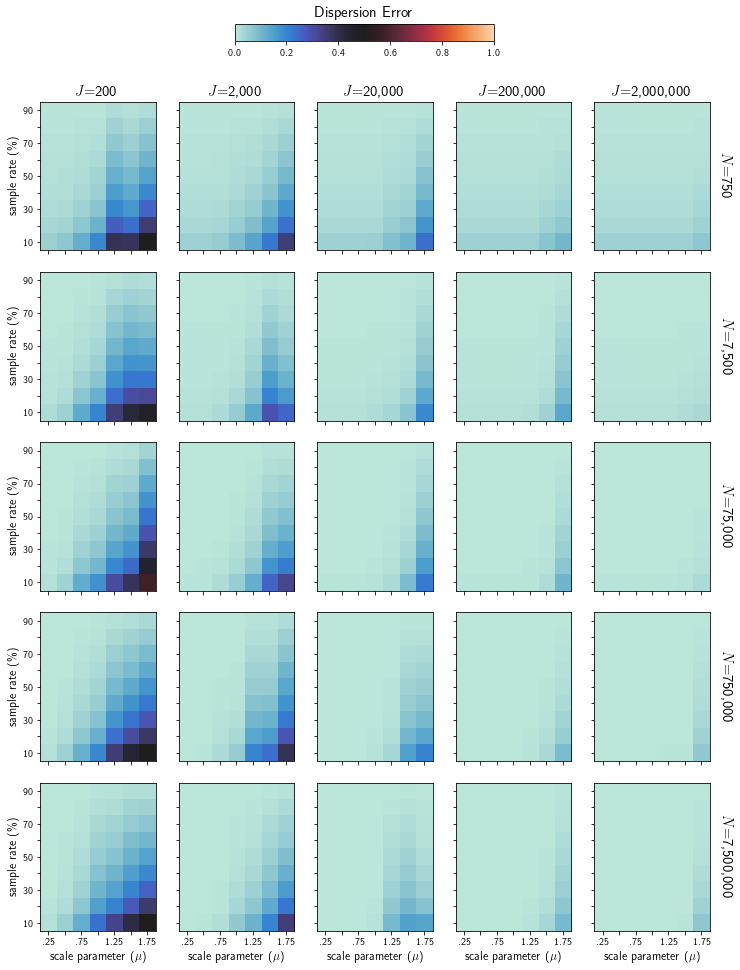

In [1261]:
metric = 'total_abs_err'
df[metric] = df[metric].astype(float).abs()

num_alts_values = df.num_alts.unique().tolist()
num_chooser_values = df.num_choosers.unique().tolist()
scale_params = df.scale.unique().tolist()
num_num_alts_values = len(num_alts_values)
num_num_chooser_values = len(num_chooser_values)

fig, axarr = plt.subplots(
    num_num_chooser_values, num_num_alts_values, 
    figsize=(12,16), 
    sharey=True, sharex=True)

for j, num_choosers in enumerate(num_chooser_values):
    for i, num_alts in enumerate(num_alts_values):
        
        ax = axarr[j,i]

        tmp_df = df[(
            df['num_alts'] == num_alts) & (
            df['num_choosers'] == num_choosers) & (
            df['sample_rate'] < 1)].copy()
        if len(tmp_df) == 0:
            continue
        tmp_df[metric] = tmp_df[metric] / (2 * num_choosers)
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '\%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='mean')
        piv_df = piv_df.sort_index(level=0, ascending=False) #/ piv_df.max().max()
        im = ax.imshow(
            piv_df,
#             cmap='RdYlGn_r',
            cmap='icefire',
            vmin=0,
            vmax=1,
        )
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.xaxis.get_major_formatter()._usetex = False
        ax.yaxis.get_major_formatter()._usetex = False
        if j == num_num_chooser_values - 1:
            ax.set_xlabel(r"scale parameter ($\mu$)", fontsize=12)
            
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels([".25", "", ".75", "", "1.25", "", "1.75"])
        if j == 0:
            ax.set_title(r"$J$" + "={0}".format(f'{num_alts_values[i]:,}'), fontsize=15)
        if i == num_num_alts_values - 1:
            ax.text(
                7.5,4, r"$N$" + "={0}".format(f'{num_choosers:,}'), size=15,
                verticalalignment='center', 
                ha='center',
                    rotation=270)
    _ = axarr[j, 0].set_ylabel("sample rate (\%)", fontsize=12)
    _ = axarr[j, 0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[j, 0].set_yticklabels(["90", "", "70", "", "50", "", "30", "", "10"], rotation='horizontal')


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.1 )
fig.subplots_adjust(top=0.85)
cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.015])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
fig.suptitle("Dispersion Error", fontsize=15, y=.93)
cbar_ax.xaxis.get_major_formatter()._usetex = False

In [1263]:
df.mape.max()

136.6121826171875

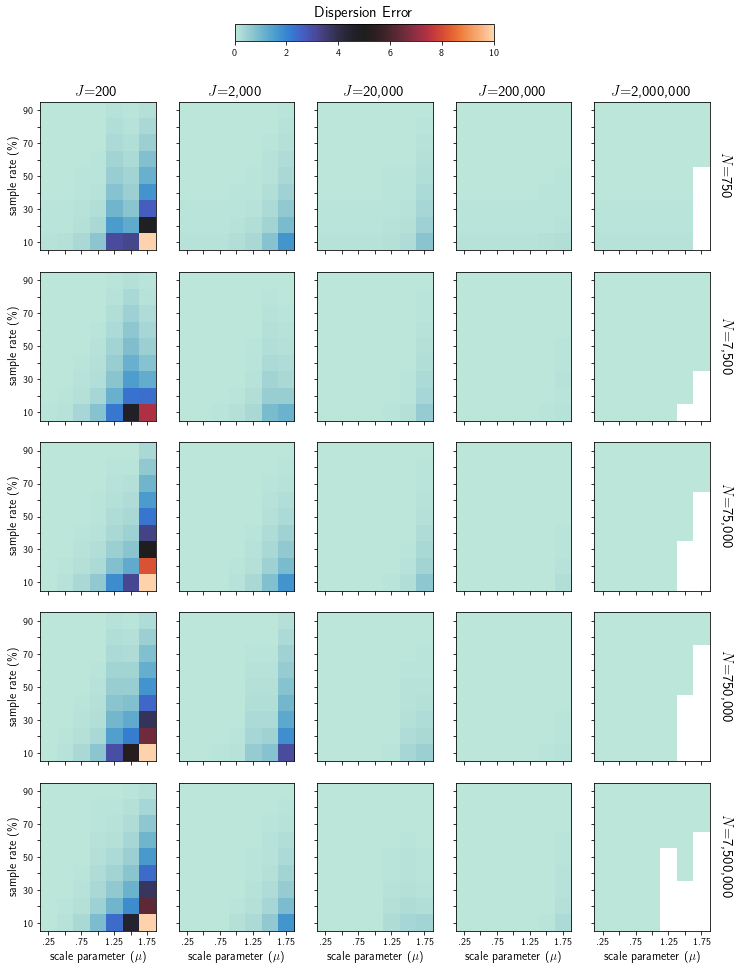

In [1267]:
metric = 'mape'
df[metric] = df[metric].astype(float).abs()

num_alts_values = df.num_alts.unique().tolist()
num_chooser_values = df.num_choosers.unique().tolist()
scale_params = df.scale.unique().tolist()
num_num_alts_values = len(num_alts_values)
num_num_chooser_values = len(num_chooser_values)

fig, axarr = plt.subplots(
    num_num_chooser_values, num_num_alts_values, 
    figsize=(12,16), 
    sharey=True, sharex=True)

for j, num_choosers in enumerate(num_chooser_values):
    for i, num_alts in enumerate(num_alts_values):
        
        ax = axarr[j,i]

        tmp_df = df[(
            df['num_alts'] == num_alts) & (
            df['num_choosers'] == num_choosers) & (
            df['sample_rate'] < 1)].copy()
        if len(tmp_df) == 0:
            continue
        tmp_df[metric] = tmp_df[metric]
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '\%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='mean')
        piv_df = piv_df.sort_index(level=0, ascending=False) #/ piv_df.max().max()
        im = ax.imshow(
            piv_df,
#             cmap='RdYlGn_r',
            cmap='icefire',
            vmin=0,
            vmax=10,
        )
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.xaxis.get_major_formatter()._usetex = False
        ax.yaxis.get_major_formatter()._usetex = False
        if j == num_num_chooser_values - 1:
            ax.set_xlabel(r"scale parameter ($\mu$)", fontsize=12)
            
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels([".25", "", ".75", "", "1.25", "", "1.75"])
        if j == 0:
            ax.set_title(r"$J$" + "={0}".format(f'{num_alts_values[i]:,}'), fontsize=15)
        if i == num_num_alts_values - 1:
            ax.text(
                7.5,4, r"$N$" + "={0}".format(f'{num_choosers:,}'), size=15,
                verticalalignment='center', 
                ha='center',
                    rotation=270)
    _ = axarr[j, 0].set_ylabel("sample rate (\%)", fontsize=12)
    _ = axarr[j, 0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[j, 0].set_yticklabels(["90", "", "70", "", "50", "", "30", "", "10"], rotation='horizontal')


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.1 )
fig.subplots_adjust(top=0.85)
cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.015])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
fig.suptitle("Dispersion Error", fontsize=15, y=.93)
cbar_ax.xaxis.get_major_formatter()._usetex = False

In [1255]:
piv_df

scale,0.25,0.50,0.75,1.00,1.25,1.50,1.75
sample_rate,,,,,,,
90\%,0.000162,0.000124,0.000107,0.000099,0.000102,0.000121,0.001062
80\%,0.000201,0.000169,0.000154,0.000148,0.000158,0.000217,0.002385
70\%,0.000239,0.000211,0.000198,0.000193,0.000214,0.000338,0.004036
60\%,0.000281,0.000256,0.000245,0.000241,0.000279,0.000495,NaN
50\%,0.000328,0.000307,0.000297,0.000295,NaN,0.000802,NaN
40\%,0.000388,0.000370,0.000362,0.000362,NaN,0.001277,NaN
30\%,0.000471,0.000456,0.000451,0.000452,NaN,NaN,NaN
20\%,0.000604,0.000592,0.000588,0.000595,NaN,NaN,NaN
10\%,0.000888,0.000881,0.000880,0.000906,NaN,NaN,NaN


/tmp/ipykernel_1389764/4294905548.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axarr[i, 0].set_yticklabels(["2e2", "2e3", "2e4", "2e5", "2e6"][::-1], rotation='horizontal')


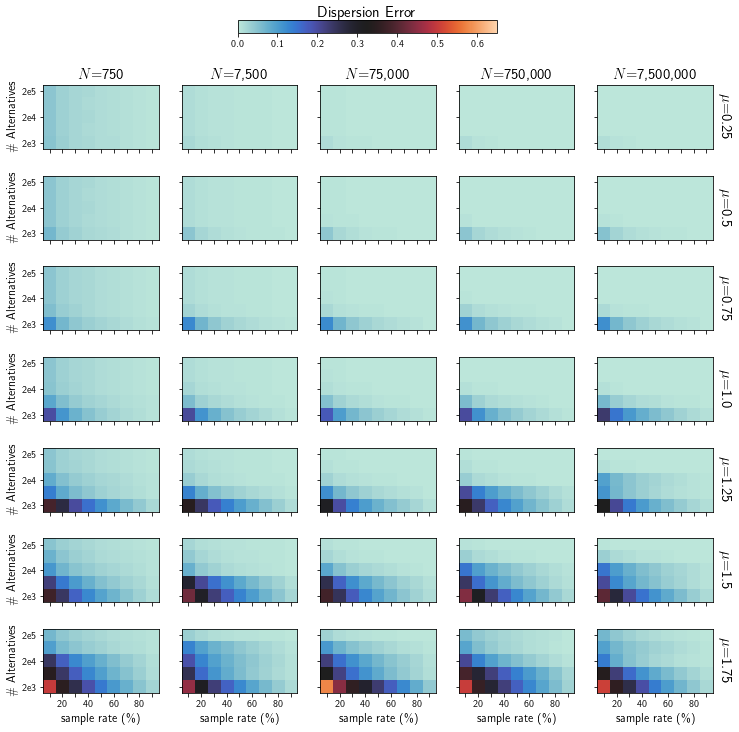

In [1260]:
metric = 'total_abs_err'
df[metric] = df[metric].astype(float).abs()

num_alts_values = df.num_alts.unique().tolist()
num_chooser_values = df.num_choosers.unique().tolist()[::-1]
scale_params = df.scale.unique().tolist()
num_scale_params = len(scale_params)
num_num_alts_values = len(num_alts_values)
num_num_chooser_values = len(num_chooser_values)

fig, axarr = plt.subplots(
    num_scale_params, 
    num_num_chooser_values, 
    figsize=(12,12), 
    sharey=True, sharex=True)

for j, num_choosers in enumerate(num_chooser_values):

    for i, scale in enumerate(scale_params):
        
        ax = axarr[i, num_num_chooser_values - 1 - j]

        tmp_df = df[(
            df['scale'] == scale) & (
            df['num_choosers'] == num_choosers) & (
            df['sample_rate'] < 1)].copy()
        if len(tmp_df) == 0:
            continue
        tmp_df[metric] = tmp_df[metric] / (2 * num_choosers)
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '\%'
        piv_df = tmp_df.pivot_table(index='num_alts', columns='sample_rate', values=metric, aggfunc='mean')
        piv_df = piv_df.sort_index(level=0, ascending=False) #/ piv_df.max().max()
        im = ax.imshow(
            piv_df,
#             cmap='RdYlGn_r',
            cmap='icefire',
            vmin=0,
            vmax=.65,
        )
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.xaxis.get_major_formatter()._usetex = False
        ax.yaxis.get_major_formatter()._usetex = False

        if i == num_scale_params - 1:
            ax.set_xlabel("sample rate (\%)", fontsize=12)
            
        ax.set_xticks(list(np.arange(9)))
        ax.set_xticklabels(["", "20", "", "40", "", "60", "", "80", ""])
        if i == 0:
            ax.set_title(r"$N$" + "={0}".format(f'{num_choosers:,}'), fontsize=15)
        if j == 0:  #num_num_chooser_values - 1:
            ax.text(
                9.5, 2, r"$\mu$" + "={0}".format(f'{scale_params[i]:,}'), size=15,
                verticalalignment='center', 
                ha='center', rotation=270)
        _ = axarr[i, 0].set_ylabel("\# Alternatives", fontsize=12)
    #     _ = axarr[i, 0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
        _ = axarr[i, 0].set_yticklabels(["2e2", "2e3", "2e4", "2e5", "2e6"][::-1], rotation='horizontal')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.1 )
fig.subplots_adjust(top=0.85)
cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.015])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
fig.suptitle("Dispersion Error", fontsize=15, y=.93)
cbar_ax.xaxis.get_major_formatter()._usetex = False

In [971]:
runtimes = df.groupby(['run_id', 'num_alts', 'num_choosers','scale'])['runtime'].mean().reset_index()
runtimes = runtimes.groupby(['run_id', 'num_alts', 'num_choosers']).runtime.sum().reset_index()
runtimes['time_per_chooser'] = runtimes['runtime'] / runtimes['num_choosers']
runtimes['total choosers'] = runtimes['num_choosers']

In [1058]:
ax0.get_ylim()

(-1654.765941648086, 34757.940394183395)

[None, None]

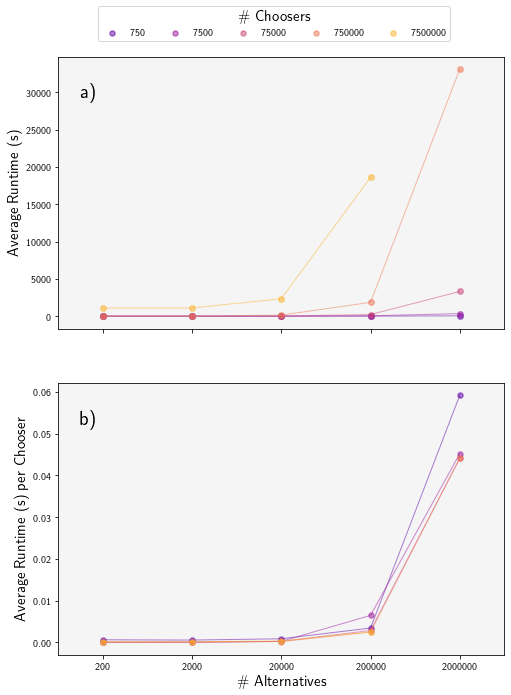

In [1064]:
fig, axarr = plt.subplots(2, 1, figsize=(8,11), sharex=True)
pal = "plasma"
ax0 = axarr[0]
sns.pointplot(
    data=runtimes, x='num_alts', y='runtime', hue='total choosers', ax=ax0, scale=.8, palette=pal,
    ci=None)
ax0.xaxis.get_major_formatter()._usetex = False
ax0.yaxis.get_major_formatter()._usetex = False
ax0.set_xlabel("", fontsize=15)
ax0.set_ylabel("Average Runtime (s)", fontsize=15)
plt.setp(ax0.collections, alpha=.5, )  # for the markers
plt.setp(ax0.lines, alpha=.5, lw=1)                          # for the lines
# ax0.set_yscale("log")
x_min, x_max = ax0.get_xlim()
x_len = x_max - x_min
y_min, y_max = ax0.get_ylim()
y_len = y_max - y_min
ax0.text(x_min + (x_len) * .05, y_max - y_len * .15, "a)", fontsize=20)
ax0.get_legend().remove()
ax0.set_facecolor("whitesmoke")

ax1 = axarr[1]
sns.pointplot(
    data=runtimes, x='num_alts', y='time_per_chooser', hue='total choosers', ax=ax1, scale=.75, palette=pal,
    legend=False, ci=None, z_order=runtimes.num_choosers.unique(),)
ax1.xaxis.get_major_formatter()._usetex = False
ax1.yaxis.get_major_formatter()._usetex = False
ax1.set_xlabel("\# Alternatives", fontsize=15)
ax1.set_ylabel("Average Runtime (s) per Chooser", fontsize=15)
plt.setp(ax1.collections, alpha=.5, )  # for the markers
_ = plt.setp(ax1.lines, alpha=.5, lw=1)  # for the lines
# ax1.set_yscale("log")
    ax1.get_legend().remove()
x_min, x_max = ax1.get_xlim()
x_len = x_max - x_min
y_min, y_max = ax1.get_ylim()
y_len = y_max - y_min
ax1.text(x_min + (x_len) * .05, y_max - y_len * .15, "b)", fontsize=20)
ax1.set_facecolor("whitesmoke")

handles, labels = ax1.get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(.5, .95), title='\# Choosers', ncol=5)
plt.setp(legend.get_title(),fontsize=15)
# fig.tight_layout()

In [1351]:
tmp_df = df.copy()
tmp_df['num alts'] = tmp_df['num_alts'].astype(str)
tmp_df['scale'] = tmp_df['scale'].astype(str)
tmp_df['dispersion error'] = tmp_df['pct_abs_err'] / 2
tmp_df['large_j'] = r"$J >$ 2000"
tmp_df.loc[tmp_df['num_alts'] <= 2000, 'large_j'] = r"$J <=$ 2000"
tmp_df['large_n'] = r"$N >$ 75000"
tmp_df.loc[tmp_df['num_choosers'] <= 75000, 'large_n'] = r"$N <=$ 75000"
tmp_df['sample_size'] = tmp_df['num_alts'] * tmp_df ['sample_rate']
tmp_df['model precision'] = r"low precision ($\mu <=$ 1)"
tmp_df.loc[tmp_df['scale'].astype(float) > 1, "model precision"] = r"high precision ($\mu >$ 1)"

In [1352]:
max_err_by_run = tmp_df.groupby(['run_id', 'scale'])['dispersion error'].max().reset_index()
max_err_by_run.columns = ['run_id', 'scale', 'max_err']

max_err_by_j = tmp_df.groupby(['run_id','scale', 'num_choosers', 'num_alts'])['dispersion error'].max().reset_index()
max_err_by_j.columns = ['run_id','scale', 'num_choosers', 'num_alts','max_err_j']

In [1353]:
tmp_df = pd.merge(tmp_df, max_err_by_run, on=['run_id', 'scale'])
tmp_df = pd.merge(tmp_df, max_err_by_j, on=['run_id', 'scale', 'num_choosers', 'num_alts'])

In [1354]:
tmp_df['normalized dispersion error'] = tmp_df['dispersion error'] / tmp_df['max_err']
tmp_df['j-normalized dispersion error'] = tmp_df['dispersion error'] / tmp_df['max_err_j']

Benefit of increasing sample rate is greatest for high-precision models with lots of alts or low precision models with few alts.

In [1358]:
tmp_df

,sample_rate,total_abs_err,pct_abs_err,rmse,mape,sd_pct_err,num_alts,num_choosers,scale,runtime,...,num alts,dispersion error,large_j,large_n,sample_size,model precision,max_err,max_err_j,normalized dispersion error,j-normalized dispersion error
0,0.1,70.700424,0.094267,0.505813,0.096905,-0.047355,200,750,0.25,1.675061,...,200,0.047134,$J <=$ 2000,$N <=$ 75000,20.0,low precision ($\mu <=$ 1),0.047134,0.047134,1.000000,1.000000
1,0.2,45.905872,0.061208,0.322478,0.062499,-0.019837,200,750,0.25,1.675061,...,200,0.030604,$J <=$ 2000,$N <=$ 75000,40.0,low precision ($\mu <=$ 1),0.047134,0.047134,0.649301,0.649301
2,0.3,32.740494,0.043654,0.237648,0.044807,-0.019004,200,750,0.25,1.675061,...,200,0.021827,$J <=$ 2000,$N <=$ 75000,60.0,low precision ($\mu <=$ 1),0.047134,0.047134,0.463088,0.463088
3,0.4,26.467817,0.035290,0.185705,0.036254,-0.011595,200,750,0.25,1.675061,...,200,0.017645,$J <=$ 2000,$N <=$ 75000,80.0,low precision ($\mu <=$ 1),0.047134,0.047134,0.374366,0.374366
4,0.5,23.133072,0.030844,0.165284,0.030938,-0.003888,200,750,0.25,1.675061,...,200,0.015422,$J <=$ 2000,$N <=$ 75000,100.0,low precision ($\mu <=$ 1),0.047134,0.047134,0.327198,0.327198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21975,0.6,1879.557495,0.002506,0.293314,inf,-0.009157,2000000,750000,1.75,4744.917009,...,2000000,0.001253,$J >$ 2000,$N >$ 75000,1200000.0,high precision ($\mu >$ 1),0.014632,0.014632,0.085635,0.085635
21976,0.7,1235.540527,0.001647,0.187795,inf,-0.005852,2000000,750000,1.75,4744.917009,...,2000000,0.000824,$J >$ 2000,$N >$ 75000,1400000.0,high precision ($\mu >$ 1),0.014632,0.014632,0.056293,0.056293
21977,0.8,758.423828,0.001011,0.110974,inf,-0.003414,2000000,750000,1.75,4744.917009,...,2000000,0.000506,$J >$ 2000,$N >$ 75000,1600000.0,high precision ($\mu >$ 1),0.014632,0.014632,0.034555,0.034555
21978,0.9,390.556458,0.000521,0.049360,0.000382,-0.001498,2000000,750000,1.75,4744.917009,...,2000000,0.000260,$J >$ 2000,$N >$ 75000,1800000.0,high precision ($\mu >$ 1),0.014632,0.014632,0.017794,0.017794


In [1377]:
f = tmp_df[(tmp_df['num_alts'] == 200) & (tmp_df['num_choosers'] == 750)]

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.pointplot(
    data=f, x="sample_rate", y="dispersion error", hue='scale',
    palette="Spectral_r", edgecolor='k', lw=.5, alpha=0.5,
    markersize=25,
#     capsize=.2, 
    ci=False,
    join=False
)
legend = ax.legend(title='scale parameter ($\mu$)')
plt.setp(legend.get_title(),fontsize=15)
ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
plt.setp(ax.collections, alpha=0.5, edgecolor='k', lw=0.5, sizes=[150])  # for the markers
plt.setp(ax.lines, alpha=1, lw=1)                                        # for the lines
ax.set_facecolor('whitesmoke')
ax.set_title(r"$J$ = 200, $N$ = 750", fontsize=15)
ax.set_xlabel("Sample Rate (\%)", fontsize=15, y=.001)
ax.set_ylabel("Dispersion Error", fontsize=15, x=.01)
g.set_xticklabels(["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"])
ax.minorticks_on()
ax.grid(axis='y', linestyle='--', which='both')
ax.tick_params(axis='x', which='minor', bottom=False)
minor_locator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator)
ax.annotate("A", fontsize=15, xy=(.14, .19), xycoords='data', xytext=(1, .15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), zorder=10)
ax.annotate("B", fontsize=15, xy=(.12, .06), xycoords='data', xytext=(.7, -0.05),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), zorder=10)
ax.annotate("C", fontsize=15, xy=(2.12, .08), xycoords='data', xytext=(3, 0.08),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), zorder=10)
plt.show()

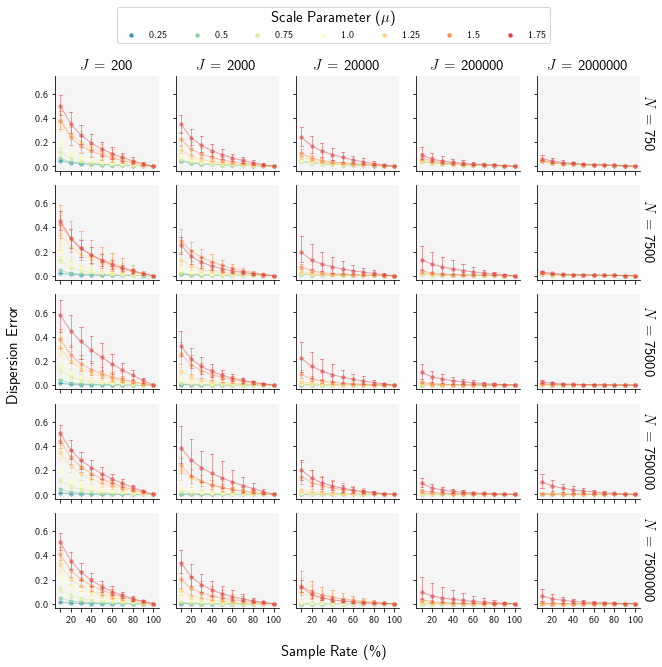

In [1050]:
g = sns.catplot(
    data=tmp_df, x="sample_rate", y="dispersion error",
    col='num alts', row="num_choosers", hue="scale", kind='point',
    height=1.7, capsize=.3, margin_titles=True, legend_out=True, palette="Spectral_r", legend=False,
    ci=99,
    scale=.5
)
g.set_titles(col_template="$J$ = {col_name}", row_template="$N$ = {row_name}", size=15)
g.set_axis_labels("","")
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
for ax in g.axes.flatten():
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections, alpha=0.5)  # for the markers
    plt.setp(ax.lines, alpha=.5, lw=1)                          # for the lines
    ax.set_facecolor('whitesmoke')
    ax.set_ylim(ax.get_ylim()[0], .75)
g.fig.supxlabel("Sample Rate (\%)", fontsize=15, y=.001)
g.fig.supylabel("Dispersion Error", fontsize=15, x=.01)
g.set_xticklabels(["", "20", "", "40", "", "60", "", "80", "", "100"])
sns.move_legend(
    g, loc='lower center', bbox_to_anchor=(0.5, 1), title=r'Scale Parameter ($\mu$)', ncol=7, frameon=True)
g.fig.tight_layout()

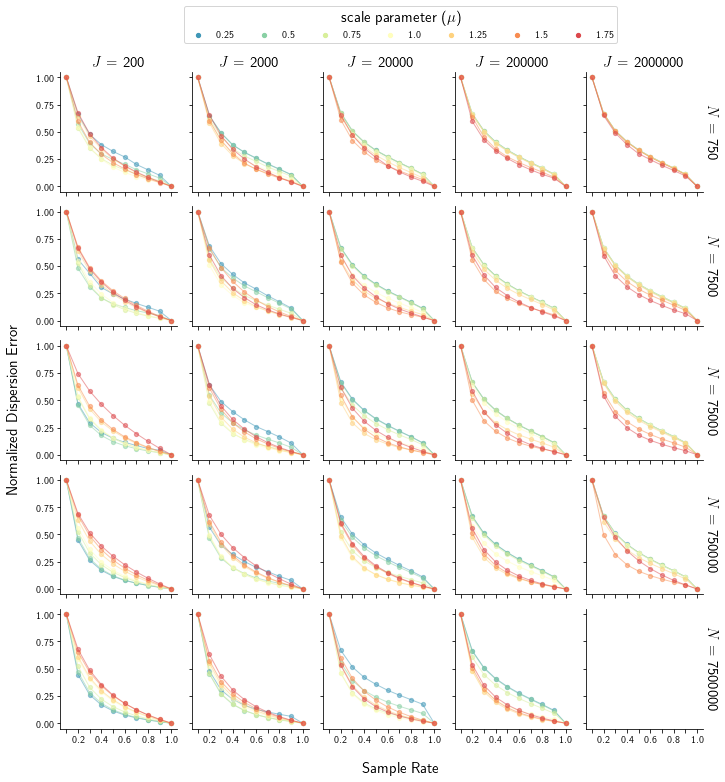

In [1015]:
g = sns.catplot(
    data=tmp_df, x="sample_rate", y="normalized dispersion error",
    col='num alts', row="num_choosers", hue="scale", kind='point',
    height=2,
#     aspect=.8,
    aspect=1,
#     capsize=.3,
    ci=None,
    scale=.6,
    margin_titles=True, legend_out=True, legend=False, palette="Spectral_r"
)
g.set_titles(col_template="$J$ = {col_name}", row_template="$N$ = {row_name}", size=15)
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
for ax in g.axes.flatten():
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections, alpha=.5)  # for the markers
    plt.setp(ax.lines, alpha=.5, lw=1)                          # for the lines

g.set_axis_labels("","")
g.fig.supxlabel("Sample Rate", fontsize=15, y=0, va="center")
g.fig.supylabel("Normalized Dispersion Error", fontsize=15, x=0, ha="center")
g.set_xticklabels(["", "0.2", "", "0.4", "", "0.6", "", "0.8", "", "1.0"])

sns.move_legend(
    g, loc='lower center', bbox_to_anchor=(0.5, 1), title=r'scale parameter ($\mu$)', ncol=7, frameon=True)

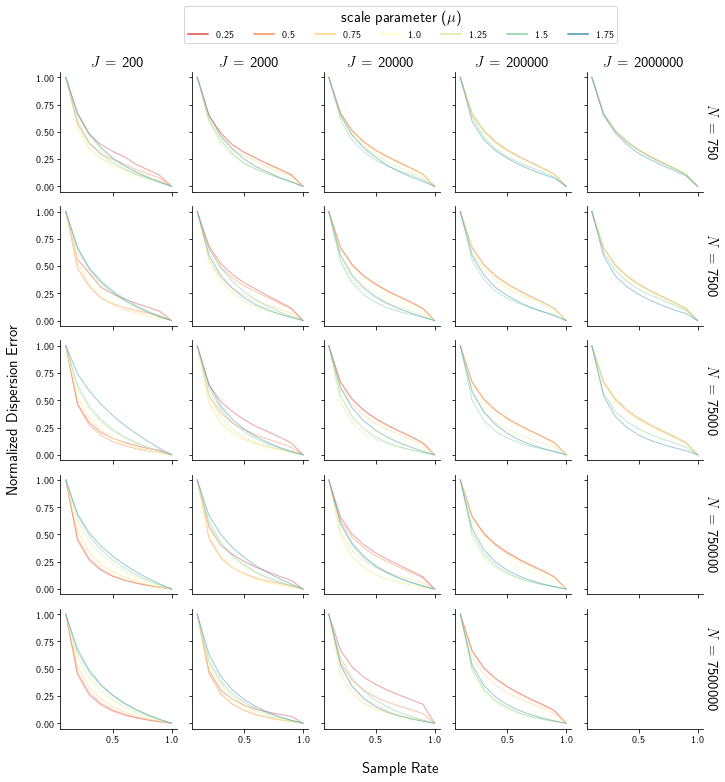

In [866]:
tmp_df['scale'] = tmp_df['scale'].astype(float)
g = sns.FacetGrid(
    data=tmp_df,
    col='num alts', row="num_choosers", hue="scale", palette="Spectral",
    height=2,
    aspect=1,
    margin_titles=True,
    legend_out=True, 
)
g.map(sns.lineplot, "sample_rate", "normalized dispersion error",)
g.set_titles(col_template="$J$ = {col_name}", row_template="$N$ = {row_name}", size=15)
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
for ax in g.axes.flatten():
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections,alpha=0, facecolor='none', lw=.5)  # for the markers
    plt.setp(ax.lines, alpha=.5, lw=1)                          # for the lines

g.set_axis_labels("","")
g.fig.supxlabel("Sample Rate", fontsize=15, y=0, va="center")
g.fig.supylabel("Normalized Dispersion Error", fontsize=15, x=0, ha="center")
# g.set_xticklabels(["", "0.2", "", "0.4", "", "0.6", "", "0.8", "", "1.0"])

sns.move_legend(
    g, loc='lower center', bbox_to_anchor=(0.5, 1), title=r'scale parameter ($\mu$)', ncol=7, frameon=True)

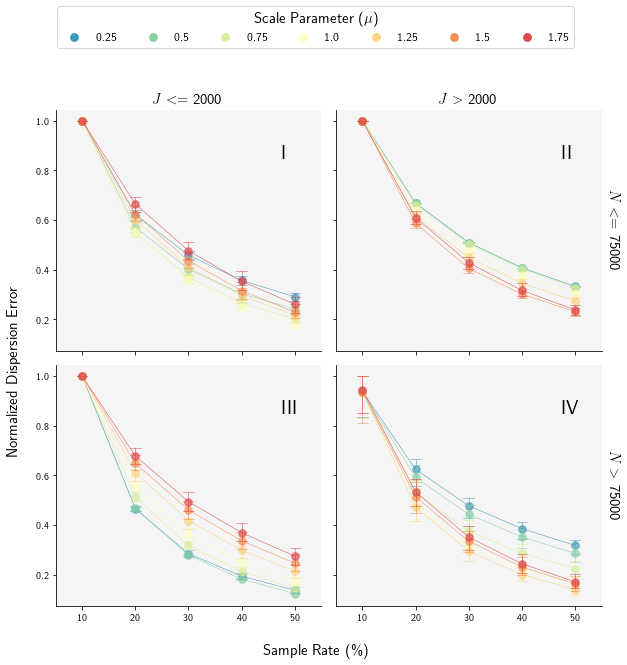

In [1051]:
g = sns.catplot(
    data=tmp_df[tmp_df['sample_rate'] <= .5],
    x="sample_rate",
    y="normalized dispersion error",
    col='large_j',
    row='large_n',
    hue="scale",
    kind='point',
    height=4,
    aspect=1,
    scale=1,
    capsize=.2, 
    ci=99,
#     errwidth=.5,
    margin_titles=True, legend_out=True, legend=False, palette="Spectral_r"
)
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=15)
quad_ids = ["I", "II", "III", "IV"]
for i, ax in enumerate(g.axes.flatten()):
    ax.text(3.75, .85, quad_ids[i], fontsize=20)
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections, alpha=.6)  # for the markers
    plt.setp(ax.lines, alpha=1, lw=.5)                          # for the lines
    ax.set_facecolor('whitesmoke')
#     ax.set_xlim(ax.get_xlim()[0], 4.5)

g.set_axis_labels("","")
g.set_xticklabels(["10", "20", "30", "40","50"])
g.fig.supxlabel("Sample Rate (\%)", fontsize=15, y=.001)
g.fig.supylabel("Normalized Dispersion Error", fontsize=15, x=.01)
sns.move_legend(g, loc='lower center', bbox_to_anchor=(0.5, 1.05), title=r'Scale Parameter ($\mu$)', ncol=7, fontsize=12, frameon=True)
g.fig.tight_layout()

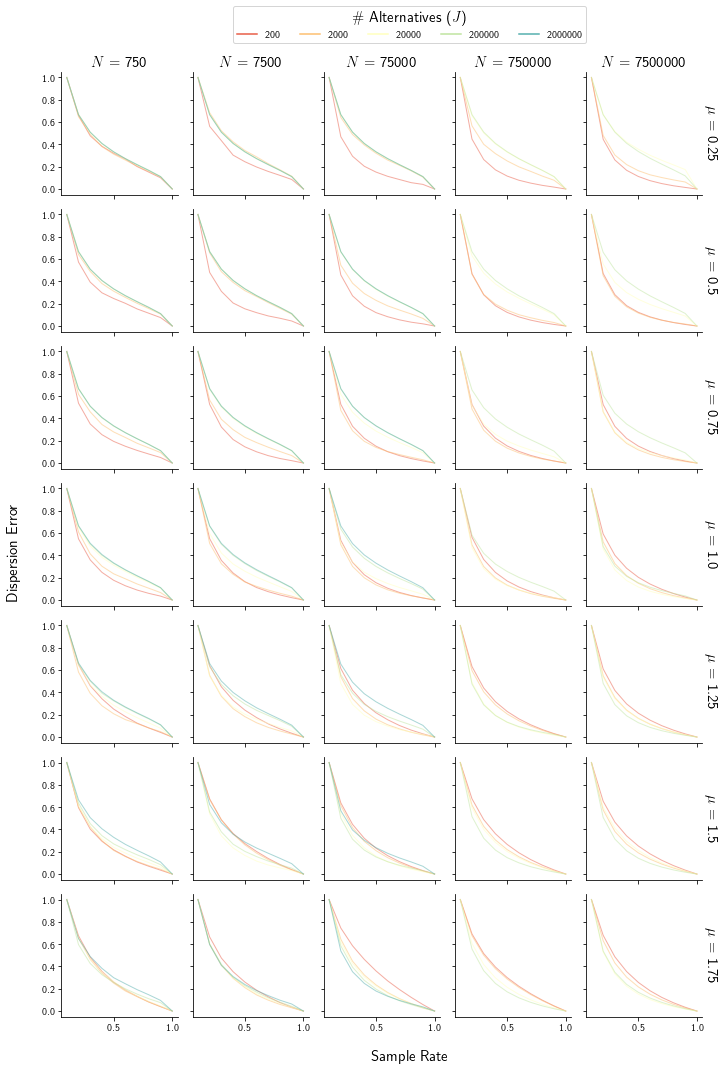

In [864]:
tmp_df['scale'] = tmp_df['scale'].astype(float)
g = sns.FacetGrid(
    data=tmp_df,
    col='num_choosers', row="scale", hue="num_alts", palette="Spectral",
    height=2,
    aspect=1,
    margin_titles=True,
    legend_out=True, 
)
g.map(sns.lineplot, "sample_rate", "j-normalized dispersion error",)
g.set_titles(col_template="$N$ = {col_name}", row_template="$\mu$ = {row_name}", size=15)
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
for ax in g.axes.flatten():
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections,alpha=0, facecolor='none', lw=.5)  # for the markers
    plt.setp(ax.lines, alpha=.5, lw=1)                          # for the lines

g.set_axis_labels("","")
g.fig.supxlabel("Sample Rate", fontsize=15, y=0, va="center")
g.fig.supylabel("Dispersion Error", fontsize=15, x=0, ha="center")
# g.set_xticklabels(["", "0.2", "", "0.4", "", "0.6", "", "0.8", "", "1.0"])

sns.move_legend(
    g, loc='lower center', bbox_to_anchor=(0.5, 1), title=r'\# Alternatives ($J$)', ncol=7, frameon=True)

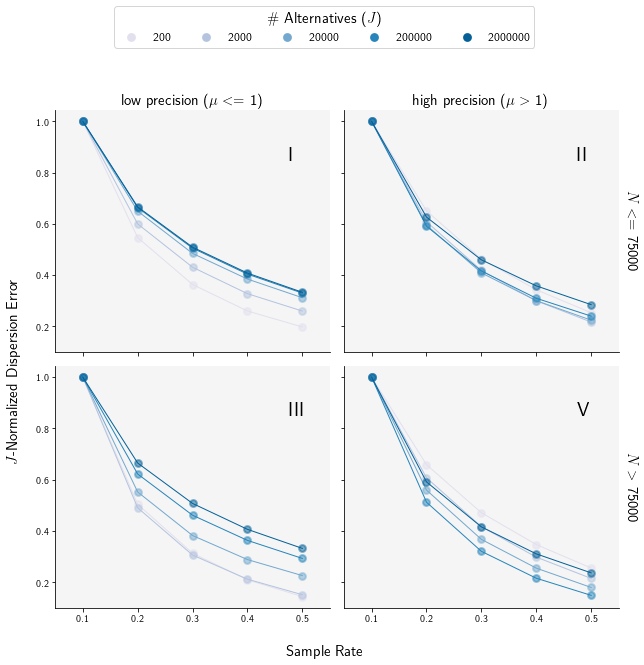

In [1034]:
g = sns.catplot(
    data=tmp_df[tmp_df['sample_rate'] < .6],
    x="sample_rate",
    y="j-normalized dispersion error",
    col='model precision',
    row='large_n',
    hue="num_alts",
    kind='point',
    height=4,
#     aspect=1,
#     scale=.6,
    capsize=.2, ci=None,
    errwidth=.5,
    margin_titles=True, legend_out=True, legend=False, palette="PuBu"
)
g.add_legend()
plt.setp(g.legend.get_title(),fontsize=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=15)
quad_ids = ["I", "II", "III", "V"]
for i, ax in enumerate(g.axes.flatten()):
    ax.text(3.75, .85, quad_ids[i], fontsize=20)
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False
    plt.setp(ax.collections,alpha=.5,)  # for the markers
    plt.setp(ax.lines, alpha=1, lw=1)                          # for the lines
    for line in ax.lines:
        if line.get_linewidth == .5:
            line.set_color('k')
    ax.set_facecolor('whitesmoke')

g.set_axis_labels("","")

g.fig.supxlabel("Sample Rate", fontsize=15, y=.001)
g.fig.supylabel(r"$J$-Normalized Dispersion Error", fontsize=15, x=.01)
sns.move_legend(g, loc='lower center', bbox_to_anchor=(0.5, 1.05), title=r'\# Alternatives ($J$)', ncol=5, fontsize=12, frameon=True)
g.fig.tight_layout()

# Importance Sampling

In [1457]:
is_df = pd.read_csv('../data/disp_err_scale_iters_importance.csv')
is_df.run_id.nunique()

40

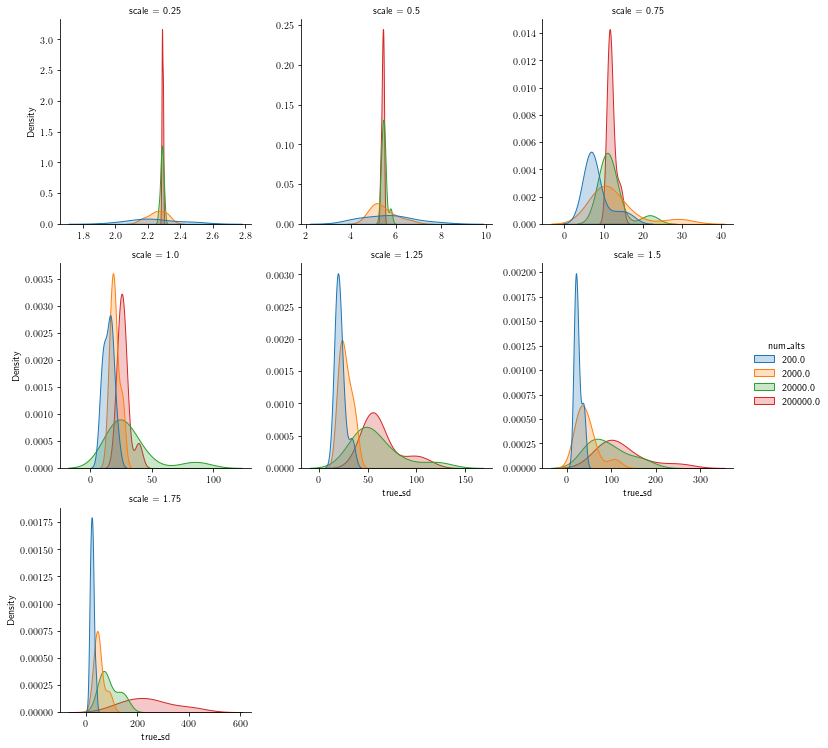

In [1483]:

sns.displot(
    data=is_df[(is_df['sample_rate'] == 1)],
    x='true_sd', fill=True, kind='kde', col='scale', col_wrap=3,
    hue=data['num_alts'].astype(str), 
    height=3.5,
    facet_kws={'sharex':False, 'sharey': False})
    

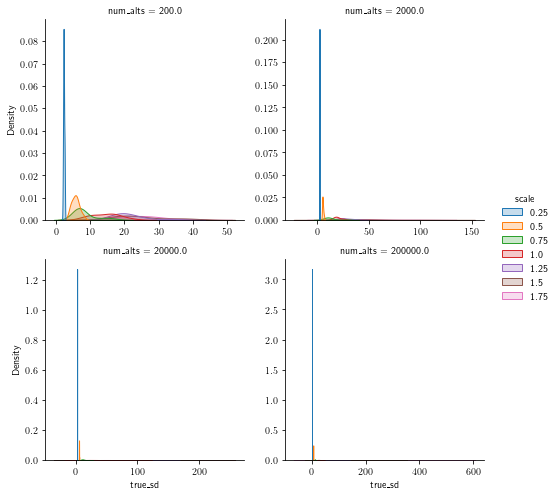

In [1484]:

sns.displot(
    data=is_df[(is_df['sample_rate'] == 1)],
    x='true_sd', fill=True, kind='kde', col='num_alts', col_wrap=2,
    hue=data['scale'].astype(str), 
    height=3.5,
    facet_kws={'sharex':False, 'sharey': False})
    

In [1230]:
is_num_alts = is_df.num_alts.unique()[0]
is_num_choosers = is_df.num_choosers.unique()[0]

In [1233]:
srs_df = pd.read_csv('../data/disp_err_scale_iters_srs.csv')

Text(0.5, 0.98, 'Dispersion Error')

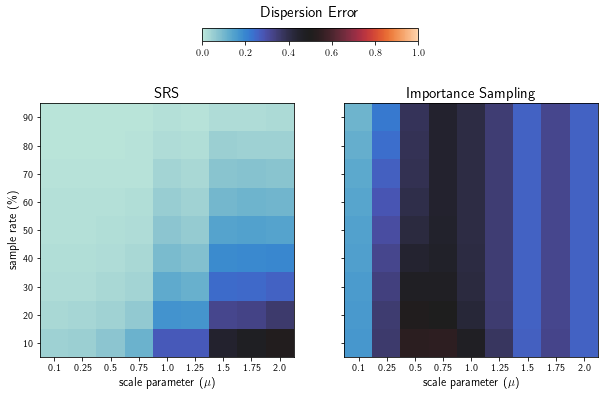

In [1242]:
fig, axarr = plt.subplots(1, 2, figsize=(10,6), sharey=True)
vmax = 1
vmin = 0
dfs = [srs_df, is_df]
labels= ['SRS', 'Importance Sampling']
for i, ax in enumerate(axarr):
    
    tmp_df = dfs[i].copy()
    tmp_df = tmp_df[tmp_df['sample_rate'] < 1]
    tmp_df['dispersion_error'] = tmp_df['total_abs_err'] / (2 * tmp_df['num_choosers'].unique())
    tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
    piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values='dispersion_error', aggfunc='mean')
    piv_df = piv_df.sort_index(level=0, ascending=False)

    im = ax.imshow(piv_df, cmap='icefire', vmin=vmin, vmax=vmax)
    ax.set_ylabel("")
    ax.set_xlabel("scale parameter ($\mu$)", fontsize=12)
    xticks_loc = ax.get_xticks().tolist()
    ax.set_xticks(list(np.arange(len(list(piv_df.columns)))))
    ax.set_xticklabels(list(piv_df.columns))
    ax.set_title(labels[i], fontsize=15)
    
    _ = axarr[0].set_ylabel("sample rate (\%)", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
fig.suptitle("Dispersion Error", fontsize=15)

In [1238]:
list(piv_df.columns)

[0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

In [1120]:
piv_df

scale,0.25,0.50,0.75,1.00,1.25,1.50,1.75
sample_rate,,,,,,,
90%,0.188170,0.387253,0.561132,0.688661,0.774332,0.859985,0.903645
80%,0.156380,0.352255,0.535145,0.669987,0.760079,0.851296,0.897602
70%,0.129470,0.314481,0.505253,0.648055,0.743058,0.840874,0.890433
60%,0.105831,0.274652,0.470235,0.622115,0.722359,0.828192,0.881548
50%,0.084567,0.233480,0.428589,0.590847,0.696535,0.812319,0.870127
40%,0.065144,0.191234,0.379549,0.551581,0.663220,0.791347,0.855355
30%,0.047224,0.147624,0.320497,0.500289,0.618650,0.761929,0.834666
20%,0.030530,0.102016,0.247835,0.430796,0.553411,0.716563,0.802027
10%,0.015213,0.053334,0.153231,0.319659,0.432263,0.629957,0.736055


In [ ]:
metric = 'total_abs_err'
for df in dfs:
    df[metric] = df[metric].astype(float).abs()
        
    num_alts_values = df.num_alts.unique().tolist()
    scale_params = df.scale.unique().tolist()
#     num_num_alts_values = len(num_alts_values)
    num_num_alts_values = 4
    fig, axarr = plt.subplots(1, num_num_alts_values, figsize=(16,6), sharey=True)
    vmax = 1
    vmin = 0
    for i, ax in enumerate(axarr):
        if i > len(num_alts_values) - 1:
            continue
        tmp_df = df[(df['num_alts'] == num_alts_values[i]) & (df['sample_rate'] < 1)]
        tmp_df[metric] = tmp_df[metric] / (2 * tmp_df['num_choosers'].unique())
        tmp_df['sample_rate'] = (tmp_df['sample_rate'] * 100).astype('int').astype(str) + '%'
        piv_df = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='median')
        piv_df = piv_df.sort_index(level=0, ascending=False)
        
        
        

        im = ax.imshow(piv_df, cmap='RdYlGn_r', vmin=vmin, vmax=vmax)
        ax.set_ylabel("")
        ax.set_xlabel("scale parameter", fontsize=12)
        xticks_loc = ax.get_xticks().tolist()
        ax.set_xticks(list(np.arange(len(scale_params))))
        ax.set_xticklabels(list(scale_params))
        ax.set_title("n={0}".format(num_alts_values[i]), fontsize=15)
        
#         std_piv = tmp_df.pivot_table(index='sample_rate', columns='scale', values=metric, aggfunc='std')
#         std_piv = std_piv.sort_index(level=0, ascending=False)
#         std_text = std_piv.values.round(2)
#         for i in range(len(piv_df.index.tolist())):
#             for j in range(len(piv_df.columns.tolist())):
#                 text = ax.text(j, i, std_text[i, j],
#                                ha="center", va="center", color="k", fontsize=8)

    _ = axarr[0].set_ylabel("sample rate", fontsize=12)
    _ = axarr[0].set_yticks(list(np.arange(len(list(piv_df.index.values)))))
    _ = axarr[0].set_yticklabels(list(piv_df.index.values), rotation='horizontal')
    fig.subplots_adjust(top=0.8)
    cbar_ax = fig.add_axes([0.35, 0.9, 0.3, 0.03])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    fig.suptitle("Dispersion Error", fontsize=20)